<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source: http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [31]:
# Import libraries

#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
# Read data in pandas

df = pd.read_csv('transfusion.data')
df.head()

# Check data has loaded correctly

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 

#rename the column names
df.columns = ['recency','frequency','monetary','time','donated']
df.head()

,recency,frequency,monetary,time,donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   recency    748 non-null    int64
 1   frequency  748 non-null    int64
 2   monetary   748 non-null    int64
 3   time       748 non-null    int64
 4   donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.isnull().sum()

recency      0
frequency    0
monetary     0
time         0
donated      0
dtype: int64

In [6]:
print("Total number of people: {}".format(df.donated[0]))
print("Number who donated blood: {}".format(df[df.donated == 1].shape[0]))
print("Number who did not donate blood: {}".format(df[df.donated == 0].shape[0]))

Total number of people: 1
Number who donated blood: 178
Number who did not donate blood: 570


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

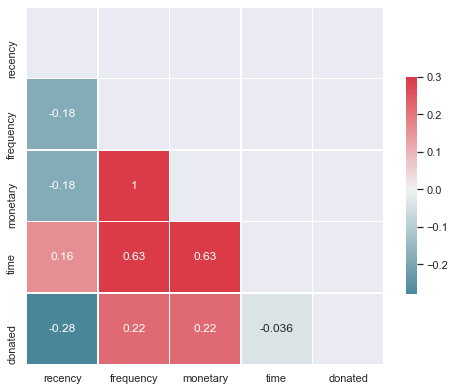

In [7]:
# Filter/subset/clean the data according to your EDA findings

#check correlation between each feature

correlation_matrix = df.corr()

# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="darkgrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [8]:
X = df[['recency','frequency','monetary','time']]
y= df['donated']

In [9]:
feature_names = ['recency','frequency','monetary','time']
class_names = ['donated', 'not donated']
print(feature_names)
print(class_names)

['recency', 'frequency', 'monetary', 'time']
['donated', 'not donated']


In [10]:
# Standardise the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X,columns=feature_names)
X

,recency,frequency,monetary,time
0,-0.927899,7.623346,7.623346,2.615633
1,-1.175118,1.282738,1.282738,-0.257881
2,-1.051508,1.796842,1.796842,0.029471
3,-0.927899,2.482313,2.482313,0.439973
4,-1.051508,3.167784,3.167784,1.753579
...,...,...,...,...
743,1.667904,-0.602307,-0.602307,0.152621
744,1.420685,-0.602307,-0.602307,0.727324
745,1.667904,-0.430940,-0.430940,1.137826
746,3.645659,-0.773675,-0.773675,0.193671


In [11]:
# Split your data

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

In [12]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (598, 4)
X_test shape : (150, 4)
y_train shape : (598,)
y_test shape : (150,)


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [21]:
# Choose a model or models

# create the classifier
model = RandomForestClassifier(oob_score=True)



# Step 9: Fit the Model

In [22]:
# Fit model

# Train the model using the training sets
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [15]:
# Evaluate model against training set

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [16]:
# Evaluate model against test set

In [23]:
# predictin on the test set
y_pred = model.predict(X_test)

In [24]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.74


In [25]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [26]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

In [27]:
model.score(X_train, y_train)

0.9381270903010034

In [28]:
model.oob_score_

0.7274247491638796

Accuracy : 0.9381 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9730 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7606 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9705                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


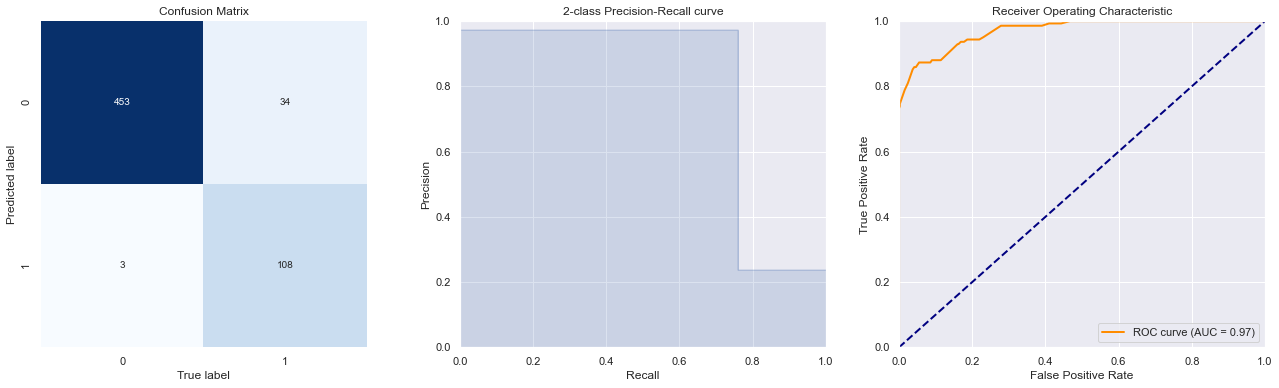

In [32]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [33]:
import time

# starting time
start = time.time()

forest_para = {'criterion':['gini','entropy'],'max_depth':[None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'class_weight':['balanced', 'balanced_subsample'], 'max_features':['auto', 'sqrt', 'log2']}
clf_GridSearchCV_forest = GridSearchCV(estimator=RandomForestClassifier(),param_grid=forest_para,scoring='accuracy',cv=5)
print(clf_GridSearchCV_forest.fit(X_train,y_train))

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                       20, 30, 40, 50, 70, 90, 120, 150],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')
Runtime of the program is 159.06132435798645


In [34]:
# gridsearchcv results for randomforest

print('Best parameters:', clf_GridSearchCV_forest.best_params_)
print('Accuracy score:', clf_GridSearchCV_forest.best_score_)
print('Accuracy test score:',accuracy_score(clf_GridSearchCV_forest.predict(X_test),y_test))
print('Precision score:', precision_score(clf_GridSearchCV_forest.predict(X_test),y_test))

# print classification report
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = clf_GridSearchCV_forest.predict(X_test)
print(classification_report(y_test, grid_predictions))

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt'}
Accuracy score: 0.7358543417366946
Accuracy test score: 0.74
Precision score: 0.5277777777777778
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       114
           1       0.46      0.53      0.49        36

    accuracy                           0.74       150
   macro avg       0.65      0.67      0.66       150
weighted avg       0.75      0.74      0.75       150



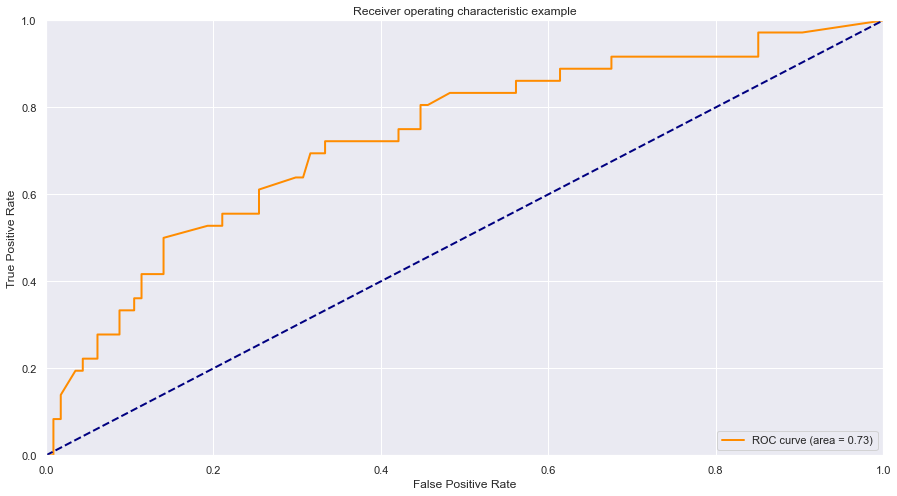

In [35]:
preds = clf_GridSearchCV_forest.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(15,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [36]:
y_pred_class = clf_GridSearchCV_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[92 22]
 [17 19]]


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



